**Annotation Preprocessing**

Author: Hammond Liu (hl3797)

Preprocess data to fit the input format of our YOLO model.

Dataset Link: [Face Mask Detection](https://www.kaggle.com/andrewmvd/face-mask-detection)


In [ ]:
# Mount the dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')


# Change working path of this project
from os import chdir, listdir
print(listdir('./'))
chdir('/content/drive/MyDrive/Sem_3/ML/F20_ML_final_project/')
print(listdir('./'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['dataset', 'projects_for_reference', 'temp', 'progress_report', 'preprocessing', 'yolo']
['dataset', 'projects_for_reference', 'temp', 'progress_report', 'preprocessing', 'yolo']


In [ ]:
import os
import cv2
import pickle
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Initialize the path for annotations and images
annotation_dir = './preprocessing/dataset/annotations/'
img_dir = './preprocessing/dataset/images/'

In [ ]:
ann_data = []

# Define a funtion to get infomations of an object.
# Return a list showing the label and the ROI [label, xmin, xmax, ymin, ymax].
def get_object_data(obj):
    label = obj.find('name').text
    box = obj.find('bndbox')
    xmin = int(box.find('xmin').text)
    xmax = int(box.find('xmax').text)
    ymin = int(box.find('ymin').text)
    ymax = int(box.find('ymax').text)
    return (label, xmin, xmax, ymin, ymax)

# Load all data from the dataset (N = 853)
for i in range(853):
    # Parse the xml file with ElementTree
    ann_path = annotation_dir + 'maksssksksss' + str(i) + '.xml'
    tree = ET.parse(ann_path)

    img_path = './.' + img_dir + tree.find('filename').text
    obj_data = [get_object_data(obj) for obj in tree.findall('object')]

    # Store the data in ann_data (dict)
    ann_data.append({'img_path': img_path, 'obj_data': obj_data})

print(ann_data)

[{'img_path': './../preprocessing/dataset/images/maksssksksss0.png', 'obj_data': [('without_mask', 79, 109, 105, 142), ('with_mask', 185, 226, 100, 144), ('without_mask', 325, 360, 90, 141)]}, {'img_path': './../preprocessing/dataset/images/maksssksksss1.png', 'obj_data': [('with_mask', 321, 354, 34, 69), ('with_mask', 224, 261, 38, 73), ('with_mask', 299, 315, 58, 81), ('with_mask', 143, 174, 74, 115), ('with_mask', 74, 95, 69, 99), ('with_mask', 191, 221, 67, 93), ('with_mask', 21, 44, 73, 93), ('with_mask', 369, 398, 70, 99), ('without_mask', 83, 111, 56, 89)]}, {'img_path': './../preprocessing/dataset/images/maksssksksss2.png', 'obj_data': [('with_mask', 68, 105, 42, 69), ('with_mask', 154, 178, 47, 74), ('with_mask', 238, 262, 34, 69), ('mask_weared_incorrect', 333, 366, 31, 65)]}, {'img_path': './../preprocessing/dataset/images/maksssksksss3.png', 'obj_data': [('with_mask', 52, 73, 53, 76), ('with_mask', 72, 92, 53, 75), ('with_mask', 112, 120, 51, 68), ('with_mask', 155, 177, 60

In [ ]:
# Utility dict for mutual conversion
label_to_idx = {'without_mask': 0, 'with_mask': 1, 'mask_weared_incorrect': 2}
idx_to_label = ('without_mask', 'with_mask', 'mask_weared_incorrect')

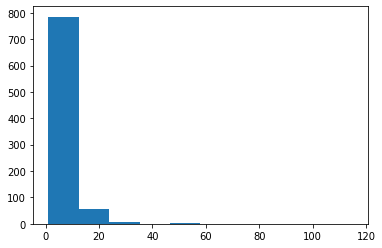

In [ ]:
# Plot a histogram of face number in images

obj_num = [len(i['obj_data']) for i in ann_data]
# print(obj_num)
plt.hist(obj_num);
plt.show()

In [ ]:
# Filter the images with too many faces
face_maximum = 12
text = []

# Generate the text to be written to .txt files
case_flag = [len(i['obj_data']) <= face_maximum for i in ann_data]
filtered_num = case_flag.count(True)
filtered_idx = []
for i in range(len(case_flag)):
    if case_flag[i]:
        case_data = [ann_data[i]['img_path']]
        for obj in ann_data[i]['obj_data']:
            case_data.append('%s,%s,%s,%s,%s' % (obj[1], obj[3], obj[2], obj[4], label_to_idx[obj[0]]))
        text.append(' '.join(case_data) + '\n')

print([text[0]])

['./../preprocessing/dataset/images/maksssksksss0.png 79,105,109,142,0 185,100,226,144,1 325,90,360,141,0\n']


In [ ]:
# Initialize the size for splitting dataset
dataset_size = len(text)
train_size = int(dataset_size * 0.6)
val_size = int(dataset_size * 0.2)
test_size = dataset_size - train_size - val_size

# Shuffle before split
random.shuffle(text)
# print(text[:5])

# Output the formatted data
train_data_ann = ''.join(text[:train_size])
val_data_ann = ''.join(text[train_size:train_size+val_size])
test_data_ann = ''.join(text[train_size+val_size:])

with open('./yolo/data/train_data.txt', 'w') as f:
    f.write(train_data_ann)
with open('./yolo/data/val_data.txt', 'w') as f:
    f.write(val_data_ann)
with open('./yolo/data/test_data.txt', 'w') as f:
    f.write(test_data_ann)